# 이상치
: 결측치, 범위에서 벗어나는 데이터, 값이 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우가 발생한다.
- 이상치 발견 시, 특정한 데이터로 대체하거나 삭제한다. </br><span style='color:#808080'> (강사님은 웬만하면 삭제를 추천하지만, 데이터의 개수에 따라 잘 고려해야 한다.)
- 결측치를 확인하는 방법
    - isna( )를 이용하여 결측치 유무 판단 -> sum( )을 이용하여 결측치 개수 확인
    - info( )를 이용하여 non-null count를 보고 결측치 존재 파악
- 특정 범위에서 벗어나는 데이터를 확인하는 방법
    - isin( )을 이용하여 특정 데이터의 포함 여부 확인 -> 비트연산자(~)를 통해 전체 데이터를 부정한 뒤 확인</br>
    <span style='color:#808080'>데이터프레임, 시리즈에서 '부정'(True <-> False)하는 방법</br>: 비트 연산자(~) 또는 - 붙이기</span>
    - value_counts( )를 이용하여 데이터의 개수를 통해 확인
    - unique( )를 이용하여 확인
- 극단치( 값이 크게 벗어나는 데이터 )
    - IQR 방식
        - matplot 안에 있는 boxplot의 이상치를 결정하는 방법
        - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 범위 지정
        - IQR = Q3 - Q1
        - 극단치의 경계
            - 상단 경계: Q3 + ( 1.5 * IQR )
            - 하단 경계: Q1 - ( 1.5 * IQR )
            > 경계 범위(1.5) 값을 조절해 극단치의 범위 변경


In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 샘플데이터셋
from sklearn.datasets import load_wine

In [2]:
# 샘플 데이터 로드
wine_data = load_wine()
wine_data

# 'data' - 2차원
# 'target' - 1차원
# 답은 하나, 문제는 여러 개인 형태

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [3]:
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

- sklearn 라이브러리에서 sample data의 키
    - data
        - 독립변수
        - 머신러닝에서 문제(학습 데이터)에 해당
    - target
        - 종속변수
        - 독립변수를 이용한 예측에 대한 답
    - frame
        - 독립변수와 종속변수 데이터를 데이터프레임으로 제공
        - 데이터가 존재하는 경우와 존재하지 않는 경우가 있다.
    - DESCR
        - 데이터의 정보 확인 <span style='color: #808080'>(데이터에 대한 설명 정도라, 크게 신경 안 써도 된다.)</span>
    - feature_names
        - 피쳐(컬럼)의 이름
    - target_names
        - 종속변수의 이름

In [4]:
wine_data['DESCR']

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

In [5]:
# 데이터프레임을 제공해주지 않았으므로('frame': None), 만들어준다.
wine = pd.DataFrame(
    data = wine_data['data'],
    columns= wine_data['feature_names'],
)

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# target_data로 데이터프레임에 추가 -> 파생변수 생성(컬럼 추가)
wine['class'] = wine_data['target']

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

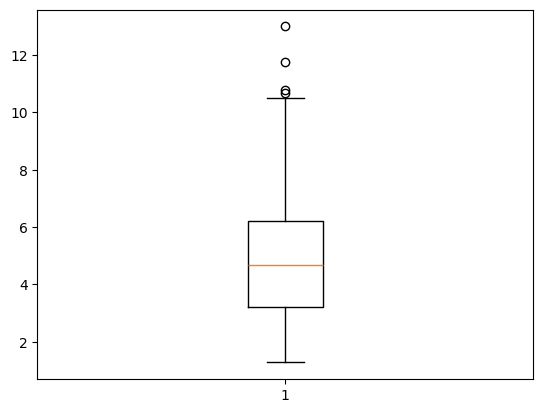

In [8]:
# 특정 컬럼을 선택해 boxplot() 그리기
# 극단치 존재 여부 확인
plt.boxplot(wine['color_intensity'])
plt.show()

In [9]:
# describe()를 이용하여 사분위수 출력 가능
wine['color_intensity'].describe()['75%']

np.float64(6.2)

In [10]:
# 또는
# numpy를 이용하여 사분위수 출력 가능
q_1, q_3 = np.percentile(
    wine['color_intensity'],
    [25, 75]  # 25%, 75%
)
q_1, q_3

(np.float64(3.2199999999999998), np.float64(6.2))

In [11]:
# IQR 계산: 3사분위수 - 1사분위수
iqr = q_3 - q_1
print(iqr)

# 상단의 경계 값: 3사분위수 + (1.5 * IQR)
upper_whis = q_3 + (1.5 * iqr)
print(upper_whis)

# 하단의 경계 값: 1사분위수 - (1.5 * IQR)
lower_whis = q_1 - (1.5 * iqr)
print(lower_whis)

2.9800000000000004
10.670000000000002
-1.2500000000000009


In [12]:
# 상단의 경계 값보다 크거나, 하단의 경계 값보다 작은 데이터 확인
flag = (wine['color_intensity'] > upper_whis) | (wine['color_intensity'] < lower_whis)

In [13]:
wine.loc[flag, ]
# 'color_intensity'에서 4개의 값이 10.67보다 큰 것을 확인할 수 있다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


극단치 데이터를 제거하는 방법
- drop( )을 이용하여 제거
- 극단치의 경계식인 flag를 부정(~)하여 필터링
- 극단치 데이터를 결측치로 대체하고, 결측치를 제거하는 함수를 이용
    - 특정 컬럼들의 극단치를 확인하여 결측치로 대체하고, 독립변수들의 결측치 존재 유무를 행 단위로 파악하여 극단치의 개수를 확인하고 제거할지 정한다.

극단치 데이터를 특정 데이터로 대체
- *Series = 단일데이터* --> 시리즈의 모든 value가 단일데이터로 변경된다.
    - Series -> *극단치의 상단/하단 경계<span style = 'color:#808080'>(인덱스 조건)</span>, 특정 컬럼명 = 상단/하단 경계 값*
        - 극단치의 상단/하단 경계는 단일데이터가 아니지만, 특정 컬럼명은 단일데이터이므로 형태가 Series로 바뀐다.
    - 대입 연산자를 사용하기 전 백업 데이터 구성

In [14]:
# 백업 데이터 생성
df = wine.copy()
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [15]:
# 극단치의 경계의 데이터를 특정한 값으로 대체
# 상단 경계보다 큰 조건식 -> 참인 경우, 'color_intensity' 데이터를 upper_whis로 대체
upper_flag = df['color_intensity'] > upper_whis
# 하단 경계보다 작은 조건식 -> 참인 경우, 'color_intensity' 데이터를 lower_whis로 대체
lower_flag = df['color_intensity'] < lower_whis

In [16]:
# 상단 경계값으로 대체
df.loc[upper_flag, 'color_intensity'] = upper_whis
# 하단 경계값으로 대체
df.loc[lower_flag, 'color_intensity'] = lower_whis

In [17]:
df.loc[flag, ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.67,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,10.67,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,10.67,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.67,0.85,1.56,695.0,2


#### 극단치를 확인하고 처리할 수 있는 함수 생성
- 매개변수 4개
    - data : 필수항목. 데이터프레임
    - cols : 컬럼 선택. 인자의 개수는 가변. (기본값, 즉 인자가 0개라면 모든 컬럼 선택)
    - cnt : 극단치의 범위 지정 (기본값 1.5)
    - type : 되돌려주는 데이터의 타입 (기본값 dict)
        - ' dict '인 경우 key는 컬럼명, value는 해당 컬럼의 극단치에 해당하는 데이터프레임.
        - ' df '인 경우 극단치에 해당하는 데이터들을 결측치로 대체
- 기준이 되는 컬럼의 개수만큼 반복 실행
    - 컬럼의 데이터에서 IQR을 구하고, 상단/하단 경계 값을 변수에 저장
    - type이 dict라면 데이터프레임에서 해당 경계를 벗어나는 부분을 데이터프레임으로 생성해, 반복을 종료하고 빈 dict에 데이터를 채워 되돌려준다.
    - type이 df라면 데이터프레임에서 해당 경계를 벗어나는 부분을 결측치로 채워, 반복을 종료하고 데이터프레임을 되돌려준다.

In [18]:
# Tip
# 변수들이 많이 만들어질 때, 일반 변수와 매개 변수의 구분을 위해 _를 붙여준다.
# 필수항목인 매개 변수는 맨 앞에, 기본값이 있는 매개 변수는 가변인 매개 변수 뒤에 배치한다.

def outlier_iqr(_data, *_cols, _cnt= 1.5, _type= 'dict'):
    # 입력받은 데이터프레임의 복사본 생성
    df = _data.copy()
    # _cols의 개수가 0개라면 모든 컬럼 선택
    # if len(_cols) == 0:
    if _cols:
        # _cols 데이터가 존재하는 경우
        cols = _cols
    else:
        # _cols 데이터가 존재하지 않는 경우
        cols = df.columns
    
    # 빈 딕셔너리 생성
    result = dict()
    # cols를 기준으로 반복문 생성
    for col in cols:
        try:
            # 해당하는 컬럼의 데이터가 숫자가 아니라면 Error가 발생해 IQR 계산 불가 --> 예외처리
            # 1사분위, 3사분위 수를 변수에 저장해 IQR 생성
            q_1, q_3 = np.percentile( df[col], [25, 75] )
            iqr = q_3 - q_1
            # 상/하단 경계 값 생성
            upper_whis = q_3 + (_cnt * iqr)
            lower_whis = q_1 - (_cnt * iqr)
            print(f'''
                    column: {col},
                    upper_whis: {upper_whis},
                    lower_whis: {lower_whis}
                ''')
            # 조건식 생성 (상단 경계보다 크거나 하단 경계보다 작은 경우)
            flag = (df[col] > upper_whis) | (df[col] < lower_whis)
            # _type에 따라 행동을 다르게 구현
            if _type == 'dict':
                # 극단치의 경계 데이터를 필터링
                outlier = df.loc[flag, ]
                # 빈 딕셔너리에 outlier 추가
                result[col] = outlier
            elif _type == 'df':
                # 극단치의 경계 밖에 있는 데이터를 결측치로 대체
                df.loc[flag, col] = np.nan
            else:
                print('_type의 값이 잘못되었습니다. dict 또는 df를 선택하세요.')
                return ''
        except Exception as e:
            print("Error: ", e)     # 에러 메시지
            print('column: ', col)  # 에러난 컬럼명
    if _type == 'df':
        result = df
    return result

In [19]:
outlier = outlier_iqr(wine, _type= 'df')
outlier


                    column: alcohol,
                    upper_whis: 15.650000000000002,
                    lower_whis: 10.389999999999997
                

                    column: malic_acid,
                    upper_whis: 5.3025,
                    lower_whis: -0.6174999999999997
                

                    column: ash,
                    upper_whis: 3.0787500000000003,
                    lower_whis: 1.6887499999999998
                

                    column: alcalinity_of_ash,
                    upper_whis: 27.950000000000003,
                    lower_whis: 10.749999999999998
                

                    column: magnesium,
                    upper_whis: 135.5,
                    lower_whis: 59.5
                

                    column: total_phenols,
                    upper_whis: 4.3862499999999995,
                    lower_whis: 0.15625000000000022
                

                    column: flavanoids,
                    upper_whis:

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,NaN,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [20]:
outlier.isna().sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [21]:
# 결측치가 하나라도 존재하는 데이터를 출력하려면?
# any() ≓ or
# all() ≓ and
outlier.loc[ outlier.isna().any(axis= 1) ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,NaN,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0.0
59,12.37,0.94,NaN,NaN,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
69,12.21,1.19,1.75,16.8,NaN,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1.0
73,12.99,1.67,2.60,NaN,NaN,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
78,12.33,0.99,1.95,14.8,NaN,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1.0
95,12.47,1.52,2.20,19.0,NaN,2.50,2.27,0.32,NaN,2.60,1.16,2.63,937.0,1.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,NaN,2.90,0.75,2.81,562.0,1.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,NaN,2.87,407.0,1.0
121,11.56,2.05,NaN,NaN,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0
123,13.05,NaN,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1.0


In [22]:
# 데이터에서 결측치가 2개 이상인 인덱스 데이터를 출력하려면?
outlier_flag = outlier.isna().sum(axis= 1) >= 2
outlier.loc[ outlier_flag, ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,NaN,NaN,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
73,12.99,1.67,2.6,NaN,NaN,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
95,12.47,1.52,2.2,19.0,NaN,2.50,2.27,0.32,NaN,2.60,1.16,2.63,937.0,1.0
121,11.56,2.05,NaN,NaN,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0


In [23]:
# 결측치가 포함되어 있는 데이터를 모두 제거하려면?

# 방법 1
outlier.dropna()
# 178 rows -> 161 rows

# outlier.dropna(axis= 1)
# 14 columns -> 7 columns

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [24]:
# 방법 2
outlier.loc[ ~(outlier.isna().any(axis= 1)) ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


일반적으로</br>
axis= 0 -> 행을 ~한다
</br>axis= 1 -> 열을 ~한다.
</br>sum( ), any( ), all( )은 반대라고 생각하면 수월하다.

In [25]:
wine_data['target_names'][2]

np.str_('class_2')

In [26]:
# 범주형 변수 생성
wine['class'].map(
    lambda x: wine_data['target_names'][x]
)

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: object

In [27]:
# 또는
wine['class'] = wine['class'].map(
    {
        0: 'Class_0',
        1: 'Class_1',
        2: 'Class_2'
    }
)

wine['class']
# class 컬럼을 범주형 데이터로 바꾼 것

0      Class_0
1      Class_0
2      Class_0
3      Class_0
4      Class_0
        ...   
173    Class_2
174    Class_2
175    Class_2
176    Class_2
177    Class_2
Name: class, Length: 178, dtype: object

In [28]:
wine['class'].value_counts()

class
Class_1    71
Class_0    59
Class_2    48
Name: count, dtype: int64

---
# 범주형 데이터의 변환
- 머신러닝 학습 모델은 대부분 숫자 데이터를 받아 수학적 연산을 이용해 모델을 생성하는데,</br>범주형 변수는 그대로 사용하기 어렵기 때문에 특별 가공 처리 필요.
- 더미 변수 사용 (**원-핫 인코딩 (One-Hot Encoding)**)
    - 범주형 데이터를 각각의 독립적인 이진(0 또는 1) 특성(컬럼)으로 변환해 포함 여부를 더미 변수로 생성

In [29]:
# 더미 변수(컬럼)를 생성하는 함수
# 가져오다(get) + 더미들(dummies) = get_dummies()
# get_dummies()는 pandas 안에 존재하는 함수
# get_dummies(데이터프레임, columns= 더미 변수 생성의 기준이 될 컬럼들)
pd.get_dummies(wine, columns= ['class'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_Class_0,class_Class_1,class_Class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,False,False,True
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,False,False,True
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,False,False,True
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,False,False,True
